# Predict Chl-a in Turbid Estuarine Water

## Data Setup

Import libraries

In [6]:
import arcpy, numpy, scipy, sklearn, sklearn.ensemble, sklearn.linear_model, pandas, seaborn, matplotlib, arcgisscripting, SSUtilities, os
from sklearn import model_selection
from sklearn import metrics

Define input data variables

In [7]:
in_dataset = r'C:\Users\zieglerhm\Documents\Files\Portfolio\Estimate_Chla\Predict_ChlA.gdb\insitu_chla_measures_points_average_cropped_bands'
in_columns = ['SHAPE@XY', 'OBJECTID', 'Station', 'Cnt_Station', 'Ave_Value_Chla', 'Latitude_DD', 'Longitude_DD',
              'b1_Band', 'b2_Band', 'b3_Band', 'b4_Band', 'b5_Band', 'b6_Band', 'b7_Band', 'b8_Band', 'b9_Band',
              'b10_Band', 'b11_Band', 'b12_Band', 'b13_Band', 'b14_Band', 'b15_Band', 'b16_Band', 'b17_Band',
              'b18_Band', 'b19_Band', 'b20_Band', 'b21_Band', 'b22_Band', 'b23_Band', 'b24_Band', 'b25_Band', 'b26_Band',
              'b27_Band', 'b28_Band', 'b29_Band', 'b30_Band', 'b31_Band', 'b32_Band', 'b33_Band', 'b34_Band', 'b35_Band', 
              'b36_Band', 'b37_Band', 'b38_Band', 'b39_Band', 'b40_Band', 'b41_Band', 'b42_Band', 'b43_Band', 'b44_Band', 
              'b45_Band', 'b46_Band', 'b47_Band', 'b48_Band', 'b49_Band', 'b50_Band', 'b51_Band', 'b52_Band', 'b53_Band',
              'b54_Band', 'b55_Band', 'b56_Band', 'b57_Band', 'b58_Band', 'b59_Band', 'b60_Band', 'b61_Band', 'b62_Band',
              'b63_Band', 'b64_Band', 'b65_Band', 'b66_Band', 'b67_Band', 'b68_Band', 'b69_Band', 'b70_Band', 'b71_Band', 
              'b72_Band', 'b73_Band', 'b74_Band', 'b75_Band', 'b76_Band', 'b77_Band', 'b78_Band', 'b79_Band', 'b80_Band',
              'b81_Band', 'b82_Band', 'b83_Band', 'b84_Band', 'b85_Band', 'b86_Band', 'b87_Band']
feat_vars = in_columns[7:]
target_var = ['Ave_Value_Chla']

Import prepared sample data from ArcGIS as numpy array

In [8]:
in_dataset_array = arcpy.da.FeatureClassToNumPyArray(in_dataset, in_columns)
in_train_spref = arcpy.Describe(in_dataset).SpatialReference
in_dataset_array[:3]

array([([-80.812425  ,  28.68695833], 1, '27010875', 1, 4.00564275, 28.68695833, -80.812425  , 27, 36, 34, 38, 47, 55, 48, 48, 48, 51, 53, 54, 56, 60, 68, 68, 65, 66, 63, 68, 74, 73, 74, 77, 76, 76, 79, 78, 75, 70, 69, 68, 67, 64, 57, 51, 47, 46, 45, 44, 43, 41, 41, 40, 38, 35, 32, 31, 33, 36, 37, 32, 27, 23, 19, 17, 15, 12,  6,  6,  7,  8, 10, 12, 10,  7,  6,  6,  7,  8,  8, 10, 12, 15, 15, 14, 14, 15, 18, 21, 21, 20, 20, 21, 24, 29, 34),
       ([-80.80071278,  28.73696694], 2, 'IRLI02', 1, 5.62214993, 28.73696694, -80.80071278, 41, 36, 33, 42, 50, 55, 51, 52, 52, 52, 52, 54, 56, 58, 66, 68, 66, 67, 62, 65, 73, 73, 74, 77, 78, 76, 76, 76, 75, 73, 70, 69, 70, 66, 58, 52, 49, 48, 48, 46, 43, 43, 44, 44, 42, 37, 34, 33, 34, 39, 41, 38, 34, 27, 26, 27, 26, 20, 15, 13, 13, 13, 15, 15, 13, 12, 11, 11, 11, 12, 12, 14, 16, 18, 19, 20, 22, 24, 25, 26, 25, 25, 25, 27, 30, 34, 41),
       ([-80.80200694,  28.63580083], 3, 'IRLI06', 1, 4.74509997, 28.63580083, -80.80200694, 26, 32, 29, 32, 41, 4

Use the print command to show the size of the dataset. Type labels for both and concatenate them with the string version of the variable.

In [9]:
print('Entire Dataset Size: {} cols x {} rows'.format(in_dataset_array.size, len(in_dataset_array[0])) )

Entire Dataset Size: 10 cols x 94 rows


Convert the numpy array to a pandas data frame

In [10]:
in_dataset_df = pandas.DataFrame(in_dataset_array, columns = in_columns[1:])
in_dataset_df

,OBJECTID,Station,Cnt_Station,Ave_Value_Chla,Latitude_DD,Longitude_DD,b1_Band,b2_Band,b3_Band,b4_Band,...,b78_Band,b79_Band,b80_Band,b81_Band,b82_Band,b83_Band,b84_Band,b85_Band,b86_Band,b87_Band
0,1,27010875,1,4.005643,28.686958,-80.812425,27,36,34,38,...,15,18,21,21,20,20,21,24,29,34
1,2,IRLI02,1,5.622150,28.736967,-80.800713,41,36,33,42,...,24,25,26,25,25,25,27,30,34,41
2,3,IRLI06,1,4.745100,28.635801,-80.802007,26,32,29,32,...,23,26,27,28,27,26,27,29,34,41
3,4,IRLI07,1,5.479870,28.603470,-80.798395,22,27,23,30,...,28,29,29,28,28,29,32,36,40,44
4,5,IRLI09E,2,4.176430,28.556361,-80.741583,14,25,24,25,...,24,25,27,28,27,28,30,36,42,49
5,6,IRLI10,1,3.926270,28.501210,-80.768594,0,3,7,18,...,18,20,21,22,23,24,26,26,28,33
6,7,IRLI13,1,3.450180,28.393066,-80.735861,30,32,34,34,...,25,27,29,30,29,29,31,35,40,47
7,8,IRLI15,1,3.955540,28.335345,-80.713094,55,57,48,46,...,35,38,40,41,41,41,43,46,48,52
8,9,IRLML02,2,2.504793,28.731917,-80.717235,25,35,38,37,...,27,28,28,29,30,32,33,34,38,45
9,10,IRLML169,1,4.315731,28.837499,-80.794821,79,70,56,62,...,29,30,32,33,33,33,35,39,44,48


To check viability of Random Forest model for the dataset, create a correlation matrix for in_dataset (which contains all 10 samples from which in_train is a subset). Cast all variables to data type 'float64' before using pandas.DataFrame.corr() to create a correlation chart.


In [11]:
correlation = in_dataset_df[numpy.array(['Ave_Value_Chla','b1_Band', 'b2_Band', 'b3_Band', 'b4_Band', 'b5_Band', 'b6_Band', 'b7_Band', 'b8_Band', 'b9_Band',
              'b10_Band', 'b11_Band', 'b12_Band', 'b13_Band', 'b14_Band', 'b15_Band', 'b16_Band', 'b17_Band',
              'b18_Band', 'b19_Band', 'b20_Band', 'b21_Band', 'b22_Band', 'b23_Band', 'b24_Band', 'b25_Band', 'b26_Band',
              'b27_Band', 'b28_Band', 'b29_Band', 'b30_Band', 'b31_Band', 'b32_Band', 'b33_Band', 'b34_Band', 'b35_Band', 
              'b36_Band', 'b37_Band', 'b38_Band', 'b39_Band', 'b40_Band', 'b41_Band', 'b42_Band', 'b43_Band', 'b44_Band', 
              'b45_Band', 'b46_Band', 'b47_Band', 'b48_Band', 'b49_Band', 'b50_Band', 'b51_Band', 'b52_Band', 'b53_Band',
              'b54_Band', 'b55_Band', 'b56_Band', 'b57_Band', 'b58_Band', 'b59_Band', 'b60_Band', 'b61_Band', 'b62_Band',
              'b63_Band', 'b64_Band', 'b65_Band', 'b66_Band', 'b67_Band', 'b68_Band', 'b69_Band', 'b70_Band', 'b71_Band', 
              'b72_Band', 'b73_Band', 'b74_Band', 'b75_Band', 'b76_Band', 'b77_Band', 'b78_Band', 'b79_Band', 'b80_Band',
              'b81_Band', 'b82_Band', 'b83_Band', 'b84_Band', 'b85_Band', 'b86_Band', 'b87_Band'])].astype('float64').corr()
correlation.head()

,Ave_Value_Chla,b1_Band,b2_Band,b3_Band,b4_Band,b5_Band,b6_Band,b7_Band,b8_Band,b9_Band,...,b78_Band,b79_Band,b80_Band,b81_Band,b82_Band,b83_Band,b84_Band,b85_Band,b86_Band,b87_Band
Ave_Value_Chla,1.000000,0.110250,-0.005274,-0.160892,0.037720,0.236918,0.163635,0.094093,0.121171,0.105461,...,-0.002702,-0.023808,-0.045213,-0.152372,-0.182189,-0.245032,-0.183113,-0.089060,-0.077450,-0.124082
b1_Band,0.110250,1.000000,0.968963,0.929777,0.979154,0.942699,0.905088,0.900804,0.903779,0.875290,...,0.600014,0.603803,0.664197,0.641333,0.625930,0.564884,0.553193,0.582838,0.602068,0.533827
b2_Band,-0.005274,0.968963,1.000000,0.978624,0.964031,0.902758,0.893336,0.893506,0.890619,0.862160,...,0.621949,0.637524,0.705098,0.690464,0.664016,0.610275,0.584948,0.625140,0.660381,0.600292
b3_Band,-0.160892,0.929777,0.978624,1.000000,0.947614,0.840990,0.854585,0.868659,0.856527,0.832292,...,0.599218,0.614692,0.680265,0.675484,0.651430,0.607505,0.570265,0.597783,0.637395,0.605319
b4_Band,0.037720,0.979154,0.964031,0.947614,1.000000,0.957883,0.949677,0.954595,0.946005,0.925004,...,0.503758,0.501986,0.559362,0.535255,0.526473,0.476030,0.454165,0.474753,0.501800,0.439362


Plot the result as a correlation matrix

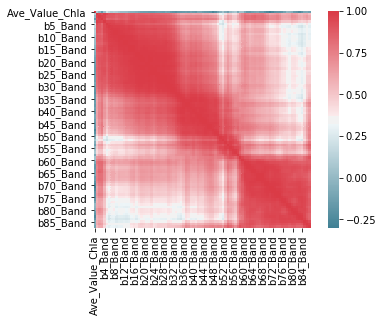

In [12]:
ax = seaborn.heatmap(correlation, cmap=seaborn.diverging_palette(220, 10, as_cmap=True), square = True, annot = False, linewidths = 0)
matplotlib.pyplot.show()

Many of the predictor variables are positive (bright red), which makes random forest a good choice as it can handle predictor variables that are dependent on each other in a way that minimizes bias.

## Train and test the random forest classifier with Leave one out Cross Validation (LOOCV)
### Test split for cross valdiation - LOOCV
We will use k-fold with 10 folds (i.e. LOOCV) to generate train/test splits for cross validation.

In [13]:
#Initialize k-folds train/test split generator object
k_folds = 10
kf = model_selection.KFold(k_folds, True)
kf_split= kf.split(in_dataset_df)

#Initialize Random Forest Regressor object
rfr = sklearn.ensemble.RandomForestRegressor(n_estimators = 500, oob_score = True, bootstrap = True)


k_rfr_fit, k_rfr_pred, k_rfr_test = [[] for x in range(3)]
i = 0

#
for train_index, test_index in kf_split:
    #Fit model and predict test set
    print('k{} | Train: {} -> {}'.format(str(i+1).zfill(2), train_index.size, train_index), 'Test: {} -> {}'.format(test_index.size, test_index))
    k_rfr_fit.append(rfr.fit(in_dataset_df[feat_vars].iloc[train_index], in_dataset_df[target_var].iloc[train_index].values.ravel())) #fit model
    k_rfr_pred.append(k_rfr_fit[i-1].predict(in_dataset_df[feat_vars].iloc[test_index])[0]) #predict and store target value
    k_rfr_test.append(in_dataset_df[target_var].iloc[test_index].values.ravel()[0]) #store test (actual) target value
    i+=1

k01 | Train: 9 -> [0 1 2 3 4 5 7 8 9] Test: 1 -> [6]
k02 | Train: 9 -> [0 2 3 4 5 6 7 8 9] Test: 1 -> [1]
k03 | Train: 9 -> [0 1 2 3 4 5 6 7 8] Test: 1 -> [9]
k04 | Train: 9 -> [0 1 2 3 4 5 6 8 9] Test: 1 -> [7]
k05 | Train: 9 -> [0 1 2 3 4 6 7 8 9] Test: 1 -> [5]
k06 | Train: 9 -> [1 2 3 4 5 6 7 8 9] Test: 1 -> [0]
k07 | Train: 9 -> [0 1 2 3 5 6 7 8 9] Test: 1 -> [4]
k08 | Train: 9 -> [0 1 2 4 5 6 7 8 9] Test: 1 -> [3]
k09 | Train: 9 -> [0 1 3 4 5 6 7 8 9] Test: 1 -> [2]
k10 | Train: 9 -> [0 1 2 3 4 5 6 7 9] Test: 1 -> [8]


Let's take a look at the result:

In [14]:
result_df = pandas.DataFrame({'Actual':k_rfr_test, 'Predicted':k_rfr_pred})
result_df['Error'] = result_df['Actual'] - result_df['Predicted']
result_df['Abs_Error'] = abs(result_df['Error'])
result_df

,Actual,Predicted,Error,Abs_Error
0,3.450180,4.505799,-1.055619,1.055619
1,5.622150,4.111887,1.510263,1.510263
2,4.315731,3.651342,0.664389,0.664389
3,3.955540,4.510842,-0.555302,0.555302
4,3.926270,4.896376,-0.970106,0.970106
5,4.005643,4.846141,-0.840499,0.840499
6,4.176430,4.129215,0.047215,0.047215
7,5.479870,4.052367,1.427503,1.427503
8,4.745100,4.549074,0.196026,0.196026
9,2.504793,4.455528,-1.950735,1.950735


#Let's take a look at a graph of the Actual vs. Predicted values.

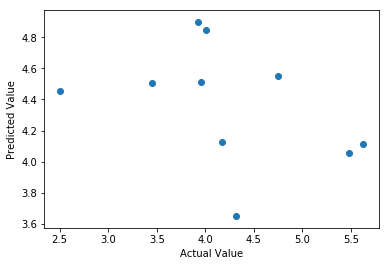

In [15]:
matplotlib.pyplot.scatter(result_df['Actual'], result_df['Predicted'])
matplotlib.pyplot.xlabel('Actual Value')
matplotlib.pyplot.ylabel('Predicted Value')
matplotlib.pyplot.show()

Also, let's graph absolute error for each k fold.

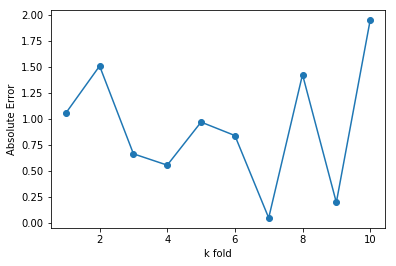

In [16]:
matplotlib.pyplot.plot(range(1,11), result_df['Abs_Error'], '-o')
matplotlib.pyplot.xlabel('k fold')
matplotlib.pyplot.ylabel('Absolute Error')
matplotlib.pyplot.show()

Check the accuracy of the result by calculating RMSE.

In [18]:
test_pred_rmse = (sum(result_df['Error']**2)/result_df.size)**0.5
print("{:>16}{:5.2f}".format("RMSE: ", test_pred_rmse))
test_pred_rmse_conf = 1.96*test_pred_rmse
print("{:>15}{:6.2f}".format("RMSE 95% Conf.:", test_pred_rmse_conf))

          RMSE:  0.54
RMSE 95% Conf.:  1.06


95% of estimated values are likely within +- [RMSE95% Conf value] of the actual value. 

### Entire Dataset

We will accept these results and see what happens when we train the Random Forest Regressor on the entire 10-sample dataset.

In [19]:
dataset_rfr = sklearn.ensemble.RandomForestRegressor(n_estimators = 500, oob_score = True, bootstrap = True)
dataset_rfr.fit(in_dataset_df[feat_vars], numpy.array(in_dataset_df[target_var]).flatten())
dataset_pred = dataset_rfr.predict(in_dataset_df[feat_vars])
dataset_actual = numpy.array(in_dataset_df[target_var]).flatten()
result_df = pandas.DataFrame({'Actual':dataset_actual, 'Predicted':dataset_pred})

In [22]:
dataset_pred_rmse = (sum((dataset_pred - dataset_actual)**2)/len(dataset_pred))**0.5
print("{:>16}{:5.2f}".format("RMSE: ", dataset_pred_rmse))
dataset_pred_rmse_conf = 1.96*dataset_pred_rmse
print("{:>15}{:6.2f}".format("RMSE 95% Conf.:", dataset_pred_rmse_conf))
dataset_pred_rsq = dataset_rfr.score(in_dataset_df[numpy.array(feat_vars)], dataset_actual)
print("{:>15}{:6.2f}".format("R^2:",dataset_pred_rsq))

          RMSE:  0.35
RMSE 95% Conf.:  0.69
           R^2:  0.84


## Run Random Forest Regressor on Raster to Estimate Chl-a for Each Cell

Import the raster which contains the dataset to be predicted where the independent variables (band reflectance) are known and the dependent variable is unknown (chl-a concentration), as a numpy array.

First, define input variables.

In [23]:
in_rast = arcpy.Raster(r'C:\Users\zieglerhm\Documents\Files\Portfolio\Estimate_Chla\Predict_ChlA.gdb\IRL_Masked')
in_rast_lowerleftpt = arcpy.Point(in_rast.extent.XMin, in_rast.extent.YMin)
in_rast_xsize = in_rast.meanCellWidth
in_rast_ysize = in_rast.meanCellHeight
in_rast_sptref = in_rast.spatialReference

Now create the raster array. Notice the output shape of in_rast_array.

In [24]:
in_rast_array = arcpy.RasterToNumPyArray(in_rast, nodata_to_value = None)
print("Shape: {}".format(in_rast_array.shape))
print("Data type: {}".format(in_rast_array.dtype))
print(in_rast_array[:3])

Shape: (87, 201, 80)
Data type: int16
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In order to use in_rast_array transpose and reshape as input as a 2d array with the number of rows being the individual cells (201 x 70 = 16080) and the number of columns being the number of bands (87).

In [25]:
in_rast_array_reshape = in_rast_array.transpose(1, 2, 0).reshape(16080,87)
print("Shape: {}".format(in_rast_array_reshape.shape))
print("Data type: {}".format(in_rast_array_reshape.dtype))
print(in_rast_array_reshape)

Shape: (16080, 87)
Data type: int16
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Apply the Random Forest Regressor model created from the 10 sample points in dataset.rar. The output is a 1d array with the estimated values of Chl-a.

In [26]:
in_rast_pred = dataset_rfr.predict(in_rast_array_reshape)
print("Shape: {}".format(in_rast_pred.shape))
print("Data type: {}".format(in_rast_pred.dtype))
print(in_rast_pred)

Shape: (16080,)
Data type: float64
[4.27534461 4.27534461 4.27534461 ... 4.27534461 4.27534461 4.27534461]


Convert the 1d array back into a 2d array of shape 201, 80, where each record in the raster grid only has one value, the estimated value of chl-a for that cell.

In [27]:
in_rast_pred_reshape = in_rast_pred.reshape(201, 80)
print("Shape: {}".format(in_rast_pred_reshape.shape))
print("Data type: {}".format(in_rast_pred_reshape.dtype))
print(in_rast_pred_reshape)

Shape: (201, 80)
Data type: float64
[[4.27534461 4.27534461 4.27534461 ... 4.27534461 4.27534461 4.27534461]
 [4.27534461 4.27534461 4.27534461 ... 4.27534461 4.27534461 4.27534461]
 [4.27534461 4.27534461 4.27534461 ... 4.27534461 4.27534461 4.27534461]
 ...
 [4.27534461 4.27534461 4.27534461 ... 4.27534461 4.27534461 4.27534461]
 [4.27534461 4.27534461 4.27534461 ... 4.27534461 4.27534461 4.27534461]
 [4.27534461 4.27534461 4.27534461 ... 4.27534461 4.27534461 4.27534461]]


Convert the numpy array back to a raster.

In [28]:
arcpy.env.overwriteOutput = True
out_rast = arcpy.NumPyArrayToRaster(in_rast_pred_reshape, in_rast_lowerleftpt, in_rast_xsize, in_rast_ysize, value_to_nodata = 4.240109488239989)
out_rast.save(r'C:\Users\zieglerhm\Documents\Files\Portfolio\Estimate_Chla\Predict_ChlA.gdb\IRL_Predicted_ChlA')
arcpy.management.DefineProjection(out_rast, in_rast_sptref)

SystemError: <built-in function __import__> returned a result with an error set

SystemError: <built-in function __import__> returned a result with an error set

SystemError: <built-in function __import__> returned a result with an error set

<Result 'C:\\Users\\zieglerhm\\Documents\\Files\\Portfolio\\Estimate_Chla\\Predict_ChlA.gdb\\IRL_Predicted_ChlA'>